<a href="https://colab.research.google.com/github/amber717M/my-ML-DS-projects/blob/main/Forecasting_Weather_with_Neural_Prophet_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**0. INSTALL AND IMPORT DEPENDENCIES**

In [2]:
pip install neuralprophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 5.4 MB/s 
     |████████████████████████████████| 419 kB 35.0 MB/s 
     |████████████████████████████████| 232 kB 57.1 MB/s 
     |████████████████████████████████| 1.4 MB 56.1 MB/s 
     |████████████████████████████████| 706 kB 51.5 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 
     |████████████████████████████████| 1.6 MB 49.7 MB/s 


In [3]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt 
import pickle 


**READ IN DATA AND PROCESS DATES**

In [4]:
df = pd.read_csv("/content/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport'],
      dtype=object)

In [7]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,117519.000000,117712.000000,115907.000000,66901.000000,61748.000000,109000.000000,117218.000000,115927.000000,116406.000000,115303.000000,107969.000000,108004.00000,74041.000000,71204.000000,117196.000000,116033.000000
mean,11.989336,22.785812,2.404930,5.317759,7.446246,40.015725,14.046870,18.871712,70.164270,52.651796,1018.031583,1015.69709,4.585486,4.627423,16.630809,21.303450
std,6.232848,6.893829,8.588866,4.258695,3.818779,13.842530,9.144256,9.117393,18.299556,20.513244,7.005150,7.54837,2.871075,2.701303,6.262533,6.715183
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,10.00000,0.000000,0.000000,-7.200000,-5.400000
25%,7.500000,17.800000,0.000000,2.600000,4.600000,30.000000,7.000000,13.000000,58.000000,38.000000,1013.400000,1011.10000,1.000000,2.000000,12.100000,16.500000
50%,11.900000,22.400000,0.000000,4.400000,8.200000,39.000000,13.000000,19.000000,71.000000,53.000000,1018.000000,1015.70000,5.000000,5.000000,16.500000,20.900000
75%,16.600000,27.500000,0.800000,7.200000,10.500000,48.000000,19.000000,24.000000,84.000000,67.000000,1022.700000,1020.30000,7.000000,7.000000,21.100000,25.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1038.20000,9.000000,9.000000,40.200000,46.700000


In [9]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [10]:
melb = df[df['Location']== 'Melbourne']
melb['Date']= pd.to_datetime(melb['Date'])
melb.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-10-1ffcab45a78e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date']= pd.to_datetime(melb['Date'])

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Date']= pd.to_datetime(melb['Date'])



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
67200,2008-07-01,Melbourne,9.5,15.4,2.0,2.8,7.0,W,63.0,W,...,60.0,38.0,1006.8,1010.3,1.0,7.0,11.0,14.6,Yes,No
67201,2008-07-02,Melbourne,11.0,14.5,0.6,5.2,4.0,W,63.0,W,...,66.0,52.0,1013.4,1016.2,7.0,4.0,11.8,13.7,No,Yes
67202,2008-07-03,Melbourne,8.4,14.1,1.4,2.0,0.8,W,39.0,W,...,72.0,58.0,1024.8,1024.3,7.0,7.0,10.6,13.9,Yes,No
67203,2008-07-04,Melbourne,9.1,14.5,0.6,1.8,4.2,E,19.0,NNW,...,87.0,49.0,1030.2,1029.0,7.0,6.0,10.2,13.1,No,No
67204,2008-07-05,Melbourne,4.3,15.5,0.0,0.8,8.4,N,52.0,N,...,81.0,52.0,1028.9,1024.9,2.0,5.0,5.5,14.6,No,No


In [13]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3193 entries, 67200 to 70392
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3193 non-null   datetime64[ns]
 1   Location       3193 non-null   object        
 2   MinTemp        2713 non-null   float64       
 3   MaxTemp        2712 non-null   float64       
 4   Rainfall       2435 non-null   float64       
 5   Evaporation    3190 non-null   float64       
 6   Sunshine       3192 non-null   float64       
 7   WindGustDir    3179 non-null   object        
 8   WindGustSpeed  3179 non-null   float64       
 9   WindDir9am     3143 non-null   object        
 10  WindDir3pm     3181 non-null   object        
 11  WindSpeed9am   3191 non-null   float64       
 12  WindSpeed3pm   3193 non-null   float64       
 13  Humidity9am    2711 non-null   float64       
 14  Humidity3pm    2706 non-null   float64       
 15  Pressure9am    2

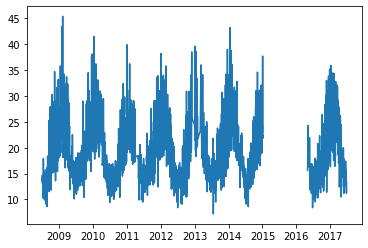

In [14]:
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-15-1d5ed38d49bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['Year'] = melb['Date'].apply(lambda x: x.year)



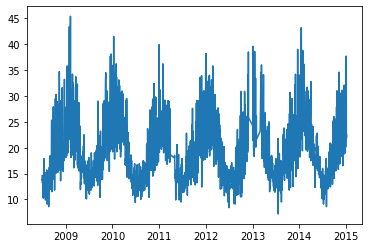

In [15]:
melb['Year'] = melb['Date'].apply(lambda x: x.year)
melb = melb[melb['Year']<=2015]
plt.plot(melb['Date'], melb['Temp3pm'])
plt.show()

In [16]:
data = melb[['Date', 'Temp3pm']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)



,ds,y
67200,2008-07-01,14.6
67201,2008-07-02,13.7
67202,2008-07-03,13.9
67203,2008-07-04,13.1
67204,2008-07-05,14.6


**TRAIN MODEL**

In [29]:
m = NeuralProphet()

In [30]:
model = m.fit(data, freq='D', epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/234 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

**FORECAST AWAY**

In [31]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.694% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.694% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.889% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.889% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 72it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-06,None,25.856453,20.274551,5.294364,0.287536
1,2015-01-07,None,25.678123,20.275349,5.434081,-0.031305
2,2015-01-08,None,25.925930,20.276142,5.569864,0.079924
3,2015-01-09,None,26.019581,20.276936,5.701001,0.041643
4,2015-01-10,None,26.085342,20.277729,5.826806,-0.019193


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


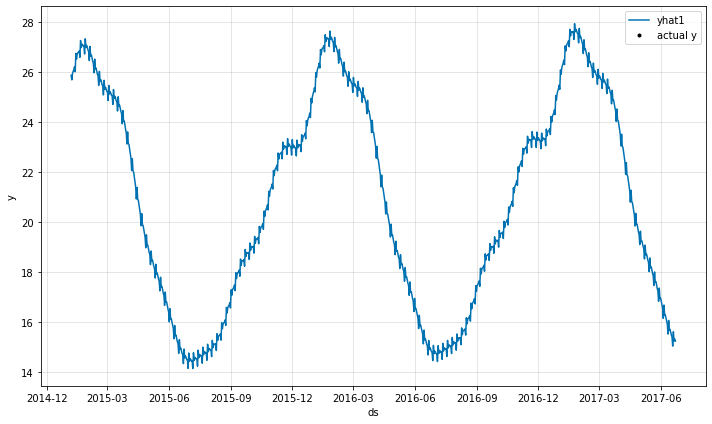

In [32]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


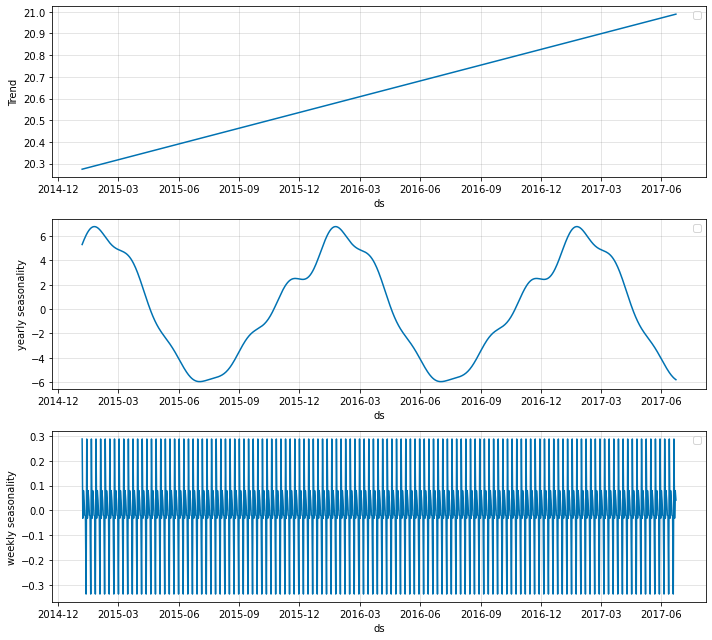

In [33]:
plt2 = m.plot_components(forecast)

**SAVE MODEL**

In [39]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [40]:
del m

In [41]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)

In [ ]:
future = m.make_future_dataframe(data, periods=900)
forecast = m.predict(future)
forecast.head()

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


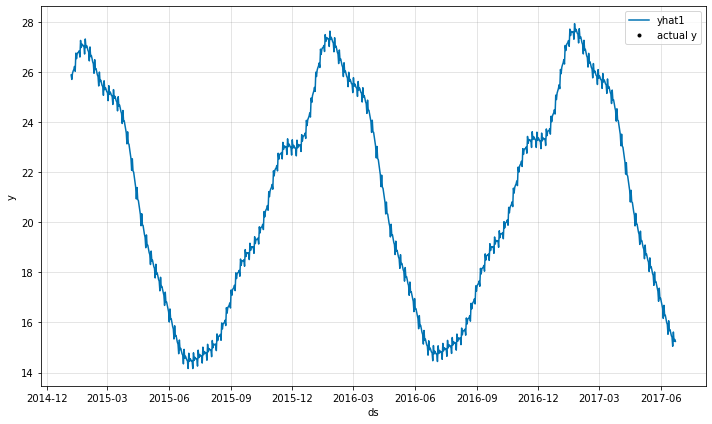

In [28]:
plot1 = m.plot(forecast)